## Car Dekho - Pricing Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
df[df['Selling_Price'] == 35]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
86,land cruiser,2010,35.0,92.6,78000,Diesel,Dealer,Manual,0


In [7]:
df[df['Selling_Price'] > df['Selling_Price'].quantile(0.99)]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
63,fortuner,2015,23.5,35.96,47000,Diesel,Dealer,Automatic,0
64,fortuner,2017,33.0,36.23,6000,Diesel,Dealer,Automatic,0
86,land cruiser,2010,35.0,92.60,78000,Diesel,Dealer,Manual,0


In [8]:
df[df['Present_Price'] > df['Present_Price'].quantile(0.99)]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
64,fortuner,2017,33.0,36.23,6000,Diesel,Dealer,Automatic,0
86,land cruiser,2010,35.0,92.60,78000,Diesel,Dealer,Manual,0


In [9]:
df[df['Kms_Driven'] > df['Kms_Driven'].quantile(0.99)]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
84,innova,2005,3.49,13.46,197176,Diesel,Dealer,Manual,0
179,Honda Karizma,2010,0.31,1.05,213000,Petrol,Individual,Manual,0
196,Activa 3g,2008,0.17,0.52,500000,Petrol,Individual,Automatic,0


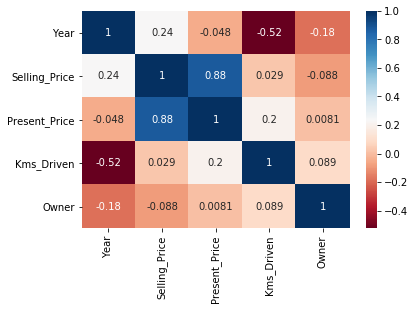

In [11]:
sns.heatmap(df.corr(), annot=True, cmap = 'RdBu')

In [12]:
df.corr()['Selling_Price']

Year             0.236141
Selling_Price    1.000000
Present_Price    0.878983
Kms_Driven       0.029187
Owner           -0.088344
Name: Selling_Price, dtype: float64

In [13]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [28]:
df['car_age'] = 2020 - df['Year']
df['car_age']

0       6
1       7
2       3
3       9
4       6
       ..
296     4
297     5
298    11
299     3
300     4
Name: car_age, Length: 301, dtype: int64

In [30]:
df.drop('Year', axis = 1, inplace = True)

In [31]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age
0,ritz,3.35,5.59,27000,2,0,1,0,6
1,sx4,4.75,9.54,43000,1,0,1,0,7
2,ciaz,7.25,9.85,6900,2,0,1,0,3
3,wagon r,2.85,4.15,5200,2,0,1,0,9
4,swift,4.60,6.87,42450,1,0,1,0,6


In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])
df['Seller_Type'] = le.fit_transform(df['Seller_Type'])
df['Transmission'] = le.fit_transform(df['Transmission'])

In [32]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age
0,ritz,3.35,5.59,27000,2,0,1,0,6
1,sx4,4.75,9.54,43000,1,0,1,0,7
2,ciaz,7.25,9.85,6900,2,0,1,0,3
3,wagon r,2.85,4.15,5200,2,0,1,0,9
4,swift,4.60,6.87,42450,1,0,1,0,6


In [33]:
df.columns

Index(['Car_Name', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'car_age'],
      dtype='object')

In [34]:
X = df[['Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'car_age']]
y = df['Selling_Price']

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [63]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

cv = []
r2_train = []
r2_test = []

def car_pred_model(model, model_name):
    
    model.fit(X_train, y_train)
    
    # R2_Score for Train Set
    pred_train = model.predict(X_train)
    r2_train_model = r2_score(y_train, pred_train)
    r2_train.append(round(r2_train_model, 2))
    
    # R2_Score for Test Set
    pred_test = model.predict(X_test)
    r2_test_model = r2_score(y_test, pred_test)
    r2_test.append(round(r2_test_model,2))
    
    # R2 Mean of Train Set using Cross Val
    cross_val = cross_val_score(model, X_train, y_train, cv = 5)
    cv_mean = cross_val.mean()
    cv.append(round(cv_mean, 2))
    
    
    # R2 Mean of Train Set using Cross Val
    print("Train R2_Score :", round(r2_train_model, 2))
    print("Test R2_Score :", round(r2_test_model, 2))
    print("Train CV Scores :", cross_val)
    print("Train CV Mean :", round(cv_mean, 2))

In [64]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

car_pred_model(reg, "Linear Regression Model")

Train R2_Score : 0.88
Test R2_Score : 0.85
Train CV Scores : [0.86919873 0.83675306 0.78691423 0.82956809 0.90042738]
Train CV Mean : 0.84


In [65]:
from sklearn.linear_model import Lasso

lasso = Lasso()

car_pred_model(lasso, "Lasso Regression Model")

Train R2_Score : 0.85
Test R2_Score : 0.8
Train CV Scores : [0.85898925 0.76170318 0.7536971  0.80534284 0.86184195]
Train CV Mean : 0.81


In [66]:
from sklearn.linear_model import Ridge

ridge = Ridge()

car_pred_model(ridge, "Ridge Regression Model")

Train R2_Score : 0.88
Test R2_Score : 0.85
Train CV Scores : [0.86965759 0.83340852 0.78892952 0.82973902 0.90148701]
Train CV Mean : 0.84


In [67]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor()

car_pred_model(dtree, "Decision Tree Regressor Model")

Train R2_Score : 1.0
Test R2_Score : 0.95
Train CV Scores : [0.95357187 0.76281346 0.66202794 0.8557016  0.92793575]
Train CV Mean : 0.83


In [68]:
from sklearn.ensemble import RandomForestRegressor

randreg = RandomForestRegressor()

car_pred_model(randreg, "Random Forest Regression Model")

Train R2_Score : 0.98
Test R2_Score : 0.96
Train CV Scores : [0.9473001  0.82970224 0.80743053 0.86568416 0.94021054]
Train CV Mean : 0.88


In [69]:
from xgboost import XGBRegressor

xgbreg = XGBRegressor()

car_pred_model(xgbreg, "XGB Regressor Model")

Train R2_Score : 1.0
Test R2_Score : 0.94
Train CV Scores : [0.96311765 0.9436438  0.87754215 0.90599143 0.91047031]
Train CV Mean : 0.92


In [71]:
model_name = ['Linear Regression', 'Lasso', 'Ridge', 'Decision Tree Regressor', 'Random Forest Regression',
             'XGB Regression']
scores = pd.DataFrame({'Models': model_name, 'R_Squared_Train':r2_train, 'R_Squared_Test': r2_test, 'CV_Mean':cv})

scores

,Models,R_Squared_Train,R_Squared_Test,CV_Mean
0,Linear Regression,0.88,0.85,0.84
1,Lasso,0.85,0.80,0.81
2,Ridge,0.88,0.85,0.84
3,Decision Tree Regressor,1.00,0.95,0.83
4,Random Forest Regression,0.98,0.96,0.88
5,XGB Regression,1.00,0.94,0.92


### How to apply RandomizedSearchCV ?

In [56]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

gb = GradientBoostingRegressor()

# Learning Rate
learning_rate = [0.001, 0.01, 0.1, 0.2]

# No of Trees in Gradient Boosting
n_estimators = list(range(500, 1000, 100))

# Maximum number of levels in a tree
max_depth = list(range(2, 10, 4))

# Minimum no of samples required to split an internal node
min_samples_split = list(range(2, 10, 2))

# Minimum no of samples required to be at a leaf node
min_samples_leaf = [1,2,5,7]

# No of Features to be considered at each split
max_features = ['auto', 'sqrt']

# Hyperparameters Dictate
param_grid = {"learning_rate": learning_rate,
             "n_estimators": n_estimators,
             "max_depth":max_depth,
             "min_samples_split":min_samples_split,
             "min_samples_leaf":min_samples_leaf,
             "max_features":max_features}

gb_rancv = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)

In [57]:
car_pred_model(gb_rancv, "RandomizedCV + GradientBoosting")

Train R2_Score : 1.0
Test R2_Score : 0.95
Train CV Scores : [0.89730538 0.76684846 0.76102828 0.89570071 0.942299  ]
Train CV Mean : 0.85
